`ASAD ASHRAF KAREL`

# A simplest Case study with Simple Linear Classification on Titanic Dataset

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


-------------

### FEATURE ENGINEERING

**1) Dealing with null values:**

In [3]:
null_values = pd.DataFrame(titanic.isnull().sum()[titanic.isnull().sum()>0], columns=['Null'])
null_values['Total_perc'] = (null_values.Null/titanic.shape[0])*100

null_values

,Null,Total_perc
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467


In [4]:
data = titanic.drop('Cabin', axis=1)

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

sns.boxplot(data=data, x='Pclass', y='Age')
plt.grid()
plt.show()

C:\Users\hi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1500x1000 with 1 Axes>

In [8]:
def age_fill(col):
    Age = col[0]
    Pclass = col[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [9]:
data['Age'] = data[['Age','Pclass']].apply(age_fill, axis=1)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
data.Embarked.dtypes

dtype('O')

In [12]:
data.Embarked.mode()

0    S
dtype: object

In [13]:
import numpy as np
data['Embarked'] = data['Embarked'].replace(np.nan, 'S')

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**2) Dealing with outliers:**

In [15]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

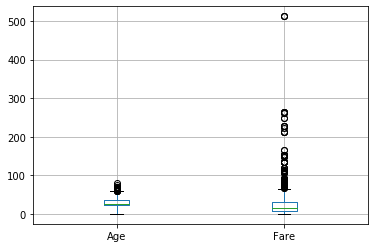

In [16]:
data[['Age', 'Fare']].boxplot()
plt.show()

In [17]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3-Q1
UL = Q3+(1.5*IQR)
LL = Q1-(1.5*IQR)

In [18]:
data['Fare']=data['Fare'].clip(LL,UL)

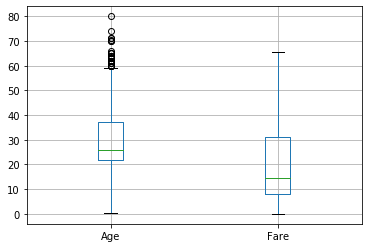

In [19]:
data[['Age', 'Fare']].boxplot()
plt.show()

-----------------

##### Effect of Feature Engineering on the data:

In [20]:
titanic.shape, data.shape

((891, 12), (891, 11))

--------------

### Comparison of the data outcomes:

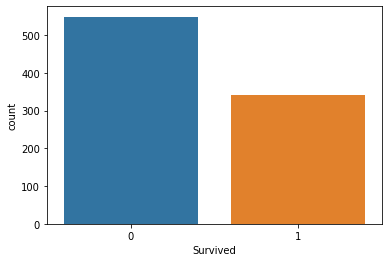

In [21]:
sns.countplot(data['Survived'])
plt.show()

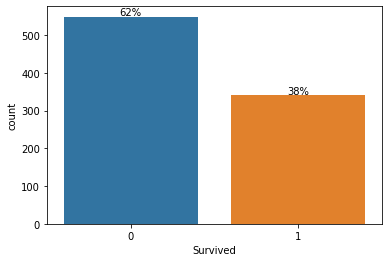

In [22]:
total=float(len(data))
ax = sns.countplot(x='Survived', data=data) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center") 

---------------

### Multicollinearity:

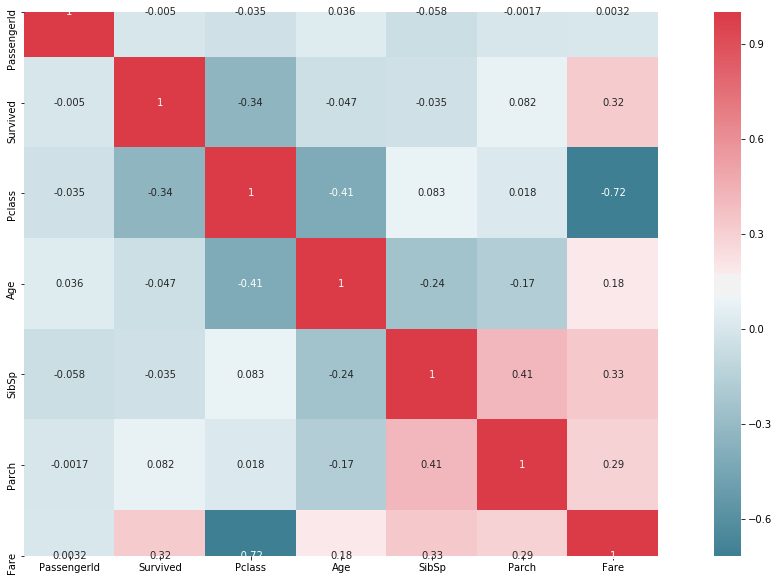

In [23]:
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.show()

C:\Users\hi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


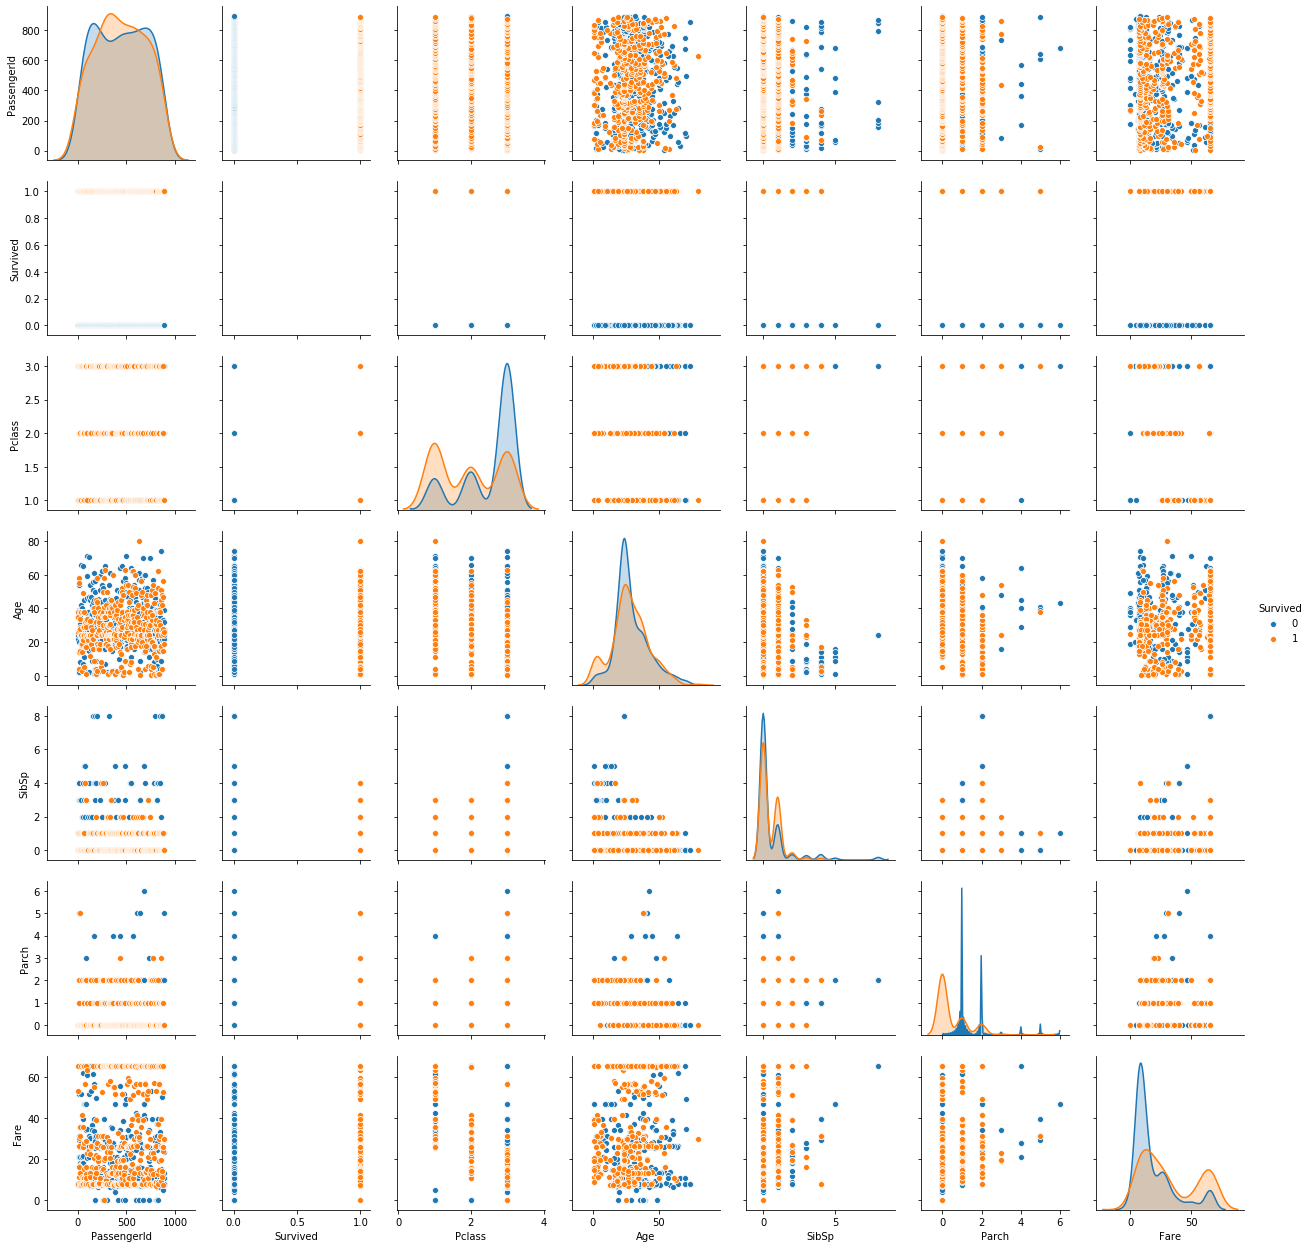

In [24]:
sns.pairplot(data, hue='Survived')
plt.show()

`Seems no multicolniearity.`

-------------

### Train-Test split for model building:

In [25]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split
X= data.drop(['Survived','Name','PassengerId','Sex','Ticket','Embarked'],axis =1)
y=data['Survived']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

-------------

### Model building:

In [27]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

In [28]:
predicted = GNB.fit(xtrain, ytrain).predict(xtest)

---------------

**Comparison in the model's outcomes:**

In [29]:
accuracy_table = pd.DataFrame({'Actual':ytest,'Predicted':predicted})
accuracy_table.head()

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0


-----------

## Model Accuracy Estimation:

In [30]:
Survived = accuracy_table[(accuracy_table['Actual']==1) & (accuracy_table['Predicted']==1)].shape[0]
Not_Survived = accuracy_table[(accuracy_table['Actual']==0) & (accuracy_table['Predicted']==0)].shape[0]

In [31]:
Accuracy = round(((Survived+Not_Survived)/accuracy_table.shape[0])*100,2)

In [32]:
Accuracy

72.07

--------

#### Final Conclusion:

`Naive Bayes model gives here 72% accuracy for the data estimation of Survived or not Survived.`

---------

# END